# Modelos de Regreción Lineal
## Modelo con datos simulados
* _Y = a + b*x_
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye: 5  + 1.9 * x + e
* e estará distribuída según N(0, 0.8)

In [129]:
import pandas as pd
import numpy as np

In [130]:
x = 1.5 + 2.5 * np.random.randn(100)

In [131]:
res = 0 + 0.8 * np.random.randn(100)

In [132]:
y_pred = 5 + 1.9 * x

In [133]:
y_act = 5 + 1.9 * x + res 

In [134]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [135]:
data = pd.DataFrame(
    {
        "x" : x_list,
        "y" : y_act_list,
        "y_pred": y_pred_list
    }
)

In [136]:
data.head()

,x,y,y_pred
0,-3.240001,-0.938988,-1.156002
1,-3.158869,-0.290625,-1.001851
2,1.004411,6.557164,6.908381
3,0.784214,7.430589,6.490007
4,-0.258224,5.734662,4.509374


In [137]:
import matplotlib.pyplot as plt

In [138]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)] #Vector que tiene el promedio para cada punto de X

Text(0.5, 1.0, 'Valor Actual vs Predicción')

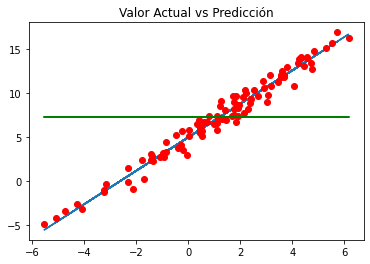

In [139]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Predicción")

In [140]:
data.corr()

,x,y,y_pred
x,1.000000,0.985607,1.000000
y,0.985607,1.000000,0.985607
y_pred,1.000000,0.985607,1.000000


In [141]:
data["SSR"] = (data["y_pred"]-np.mean(y_act))**2
data["SSD"] = (data["y_pred"]-data["y"])**2
data["SST"] = (data["y"]-np.mean(y_act))**2

In [142]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,-3.240001,-0.938988,-1.156002,71.922453,0.047095,68.288687
1,-3.158869,-0.290625,-1.001851,69.331597,0.505843,57.993306
2,1.004411,6.557164,6.908381,0.173329,0.123353,0.589124
3,0.784214,7.430589,6.490007,0.696727,0.884694,0.011211
4,-0.258224,5.734662,4.509374,7.926112,1.501332,2.528248


In [143]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [144]:
SSR

2298.800180753145

In [145]:
SSD

66.92268964640527

In [146]:
SST

2328.152129266215

In [147]:
SSR+SSD

2365.72287039955

In [148]:
R2 = SSR/SST
R2

0.9873925985574142

(array([ 2.,  9., 17., 14., 17., 21.,  7.,  3.,  5.,  5.]),
 array([-1.73769897, -1.36723709, -0.99677522, -0.62631334, -0.25585147,
         0.11461041,  0.48507229,  0.85553416,  1.22599604,  1.59645791,
         1.96691979]),
 <BarContainer object of 10 artists>)

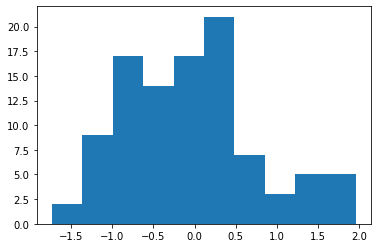

In [150]:
plt.hist(data["y_pred"]-data["y"])

# Obteniendo la recta de regresión
* y = a + b*x
* b = sum((xi -x_m) * (y_i - y_m)/sum((xi-x_m)^2)
* a = y_m -b * x_m

In [155]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y"])

In [194]:
b = np.round_((sum((data["x"]-x_mean) * ((data["y"]-y_mean))) / sum((data["x"]-x_mean)**2)),5)
a = np.round_((y_mean - b*x_mean),5)

In [195]:
print("Los coeficientes del modelo lineal son Y = " + str(a)+ " + "+ str(b) + "*X")

Los coeficientes del modelo lineal son Y = 5.06729 + 1.88467*X


In [196]:
data["Y_model"] = a + b*data["x"]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

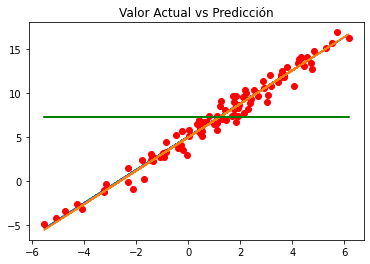

In [205]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
%matplotlib inline
plt.plot(x, data["Y_model"])
plt.plot(x, y_act, "ro")
plt.plot(x, y_pred)
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Predicción")

In [198]:
SSR = sum((data["Y_model"]-y_mean)**2)
SSD = sum((data["Y_model"]-data["y"])**2)
SST = sum((data["y"]-y_mean)**2)
SSR, SSD, SST

(2261.6188740593316, 66.53362194223065, 2328.1521292662155)

In [199]:
R2 = SSR / SST
R2

0.9714222905064825

In [200]:
data.head()

,x,y,y_pred,SSR,SSD,SST,Y_model
0,-3.240001,-0.938988,-1.156002,71.922453,0.047095,68.288687,-1.039043
1,-3.158869,-0.290625,-1.001851,69.331597,0.505843,57.993306,-0.886135
2,1.004411,6.557164,6.908381,0.173329,0.123353,0.589124,6.960273
3,0.784214,7.430589,6.490007,0.696727,0.884694,0.011211,6.545275
4,-0.258224,5.734662,4.509374,7.926112,1.501332,2.528248,4.580622


# Error estándar residual RSE

In [207]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8239626870281194

In [208]:
np.mean(data["y"])

7.32470882188162

In [209]:
RSE / np.mean(data["y"])

0.11249084531068831